In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import sys
import cv2


In [45]:
#Showing the image
def show_image(image):
    plt.imshow(image)
    plt.show()

In [46]:
#Adding function for MSE of picture
def mse(imageA, imageB):
    # The Mean Squared Error between two images is the sum of the squared difference
    # between the two images divided by the total number of pixels.
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

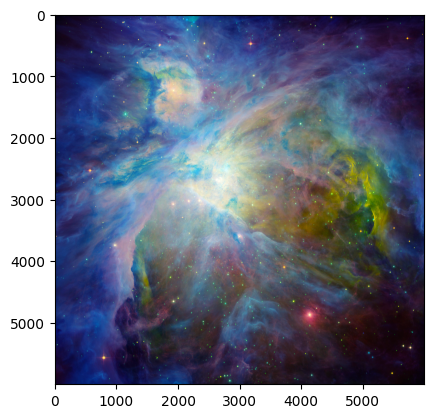

(6000, 6000, 3)

In [47]:
#Loading image 
image = cv2.imread('planet.jpg', 1)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_image(image)
image 
image = np.array(image,dtype=np.int64)
image.shape

In [48]:
#Lovering resolution of the image
def lower_resolution(image, factor):
    print(image.shape)
    height, width, chanels = image.shape
    new_height = height // factor
    new_width = width // factor
    new_image = np.zeros(( new_height, new_width,chanels), dtype = np.int64)
    for c in range(chanels):
        for i in range(new_height):
            for j in range(new_width):
                new_image[i,j,c] = image[i*factor,j*factor,c]
    return new_image






(6000, 6000, 3)


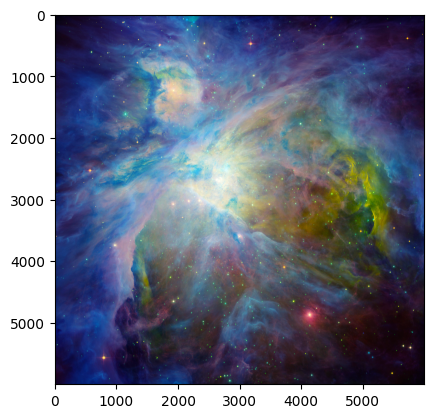

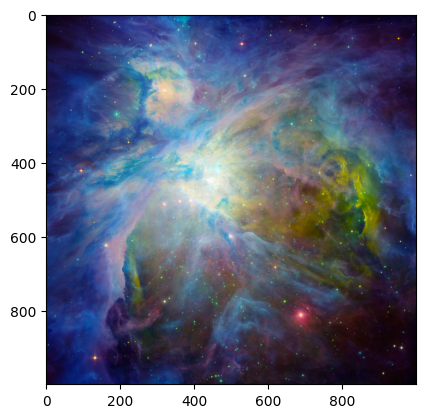

In [49]:

image_low_res = lower_resolution(image, 6)
show_image(image)
show_image(image_low_res)


In [50]:

#Metoda najblizeg suseda
def ClossestNeibourInterpolate(image, factor):
    print(image.shape)
    height, width, chanels = image.shape
    new_height = height * factor
    new_width = width * factor
    new_image = np.zeros(( new_height, new_width,chanels), dtype = np.int64)
    print(new_image.shape)
    for c in range(chanels):
        for i in range(new_height):
            for j in range(new_width): 
                new_image[i,j,c] = image[round(i/factor) - 1,round(j/factor)- 1,c]
    return new_image

(1000, 1000, 3)
(6000, 6000, 3)


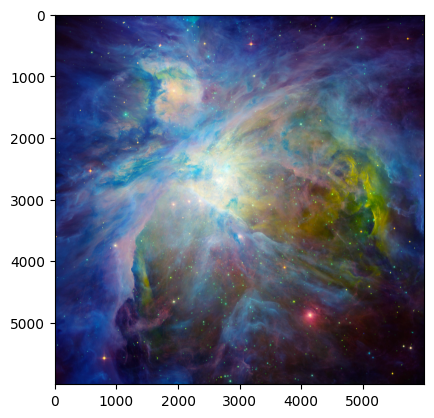

In [51]:
new_imageCN = ClossestNeibourInterpolate(image_low_res, 6)
show_image(new_imageCN)

In [52]:
#Linearna interpolacija slike 
def linear_interpolation(image, factor):
    print(image.shape)
    height, width, chanels = image.shape
    new_height = height * factor
    new_width = width * factor
    new_image = np.zeros(( new_height, new_width,chanels), dtype = np.int64)
    print(new_image.shape)
    for c in range(chanels):
        for i in range(height):
            for j in range(width):
                new_image[i*factor,j*factor,c] = image[i,j,c] #copying the pixel
    for c in range(chanels):
        for i in range(height):
            for j in range(width - 1):
            #interpolating the pixel in the row
                startPixel = image[i,j,c]
                endPixel = image[i,j+1,c]
                x1 = j*factor
                x2 = j*factor + factor
                y1 = startPixel
                y2 = endPixel
                for x in range(x1, x2):
                    y = y1 + (y2 - y1) * (x - x1) / factor
                    if y > 255:
                        print(y)
                        print(y1)
                        print(y2)
                        print("Expretion", y2 - (y2+1))
                    new_image[i*factor,x,c] = y  
            #interpolating the pixel in the column
    for c in range(chanels):
        for i in range(height - 1):
            for j in range(new_width):
                startPixel = new_image[i * factor,j,c]
                endPixel = new_image[(i+1)*factor,j,c]
                x1 = i*factor
                x2 = i*factor + factor
                y1 = startPixel
                y2 = endPixel
                for x in range(x1, x2):
                    y = y1 + (y2 - y1) * (x - x1) / factor
                    new_image[x,j,c] = y
    return new_image

(1000, 1000, 3)
(6000, 6000, 3)


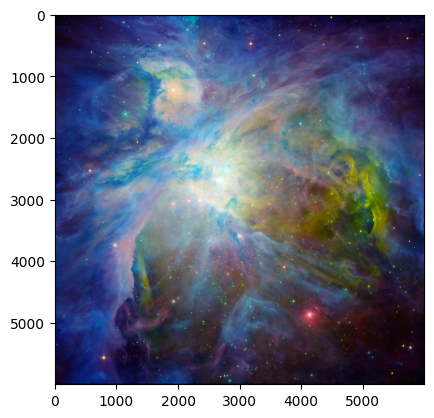

In [53]:
new_imageLI = linear_interpolation(image_low_res, 6)
show_image(new_imageLI)

In [ ]:
def Lagrange(Pixels, k, x, factor=10, dim=1):
    # Lagrange interpolation formula
    result = 1
    for i in range(len(Pixels)):
        if i != k:
            xi = Pixels[i][dim]   
            xk = Pixels[k][dim]   
            result *= (x - xi) / (xk - xi)
    return result


def bicubic_interpolation(image, factor):
    height, width, chanels = image.shape
    new_height = height * factor
    new_width = width * factor
    new_image = np.zeros((new_height, new_width, chanels), dtype=np.int64)
    for c in range(chanels):
        for i in range(height):
            for j in range(width):
                new_image[i * factor, j * factor, c] = image[i, j, c] 
                 #copying the pixel
    for c in range(chanels):
        for i in range(height):
            j = 0

            while j < width - 1:
                Pixels = []
                for k in range(4):
                    Pixels.append([i * factor , j * factor, c])
                    j += 1
                    if j >= width:
                        break
                while len(Pixels) < 4:
                    j = j - len(Pixels) - 1
                    Pixels.append([i * factor, j * factor, c])
                    j -= 1
                x1 = Pixels[0][1] 
                x_end = Pixels[-1][1] 
                for x in range(x1, x_end + 1):
                    y = 0
                    for k in range(len(Pixels)):
                        y += image[int(Pixels[k][0] / factor), int(Pixels[k][1]/ factor), int(Pixels[k][2]) ] * Lagrange(Pixels, k, x,factor, 1)
                    new_image[i * factor, x, c] = y
                j-= 1
    for c in range(chanels):
        for j in range(new_width):
            i = 0
            while i < height - 1:
                Pixels = []
                for k in range(4): 
                    Pixels.append([i * factor, j, c])
                    i += 1
                    if i >= height:
                        break
                while len(Pixels) < 4:
                    i = i - len(Pixels) - 1
                    Pixels.append([i * factor, j, c])
                    i -= 1
                y1 = Pixels[0][0]
                y_end = Pixels[-1][0]
                for y in range(y1 , y_end):
                    x = 0
                    for k in range(len(Pixels)):
                        value = new_image[int(Pixels[k][0]), int(Pixels[k][1]), int(Pixels[k][2])]
                        x += value * Lagrange(Pixels, k, y, factor , 0)
                       # print("Y", y)
                       # print("X", x)
                       # print("Pixels", Pixels)
                       # print("k", k)   
                       # print("Lagrange", Lagrange(Pixels, k, y, factor, 0))
                    new_image[y, j, c] = x
                i -= 1
    for i in range(new_height):
        for j in range(new_width):
            for c in range(chanels):
                if new_image[i, j, c] < 0:
                    new_image[i, j, c] = 0
                elif new_image[i, j, c] > 255:
                    new_image[i, j, c] = 255  
    print(new_image.shape)
    return new_image

(6000, 6000, 3)


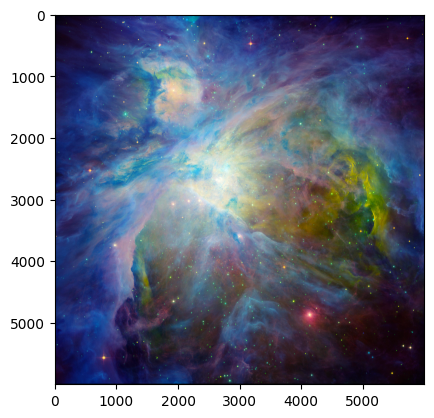

In [55]:
BiImage = bicubic_interpolation(image_low_res, 6)
show_image(BiImage)

In [56]:
#Calculating MSE
mseCN = mse(image, new_imageCN)
mseLI = mse(image, new_imageLI)
mseBi = mse(image, BiImage)
print("MSE for Clossest Neibour Interpolate: ", mseCN)
print("MSE for Linear Interpolation: ", mseLI)
print("MSE for Bicubic Interpolation: ", mseBi)

#Saving the images
print(new_imageCN.shape)
cv2.imwrite('planinaCN.jpg', new_imageCN)
cv2.imwrite('planinaLI.jpg', new_imageLI)
cv2.imwrite('planinaBi.jpg', BiImage)


MSE for Clossest Neibour Interpolate:  122.79043022222223
MSE for Linear Interpolation:  23.771944694444443
MSE for Bicubic Interpolation:  26.306002
(6000, 6000, 3)


True